<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Supervised_Learning_Iris_Classification_Scikit_Learn_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning




##What is machine learning?

Giving computers the ability to learn to make decisions from data, without being explicitly programmed.

Where are labels present we call it Supervised Learning. Machine Learning task to predict a particular "Target variable"

*   Classification (Categorical variable)
*   Regression (Continuous variable)


Target variable = dependent variable = response variable

Features = predictor variables = independent variables

Sklearn that integrates well with Scipy Stack 

# The iris dataset

## Get to know the dataset

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# Import Iris dataset from sklearn

iris = datasets.load_iris()
print(type(iris))

# Dataset of Iris we see is a "Bunch" class that works similar to a dictionary
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
# We get in iris['Data'] key
print(type(iris['data'])) # or type(iris.data)

# Shape 150,4
print(iris.data.shape)

# Now we look at columns with key 'target_names' and 'feature_names'
print(iris.target_names)
print(iris.feature_names)

<class 'numpy.ndarray'>
(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Import as a pandas DataFrame

In [ ]:
# Make a DataFrame only with feature columns
X = pd.DataFrame(iris.data,columns=iris.feature_names)
display(X.head())

# Create y keeping data as a numpy array
y= iris.target
display(y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

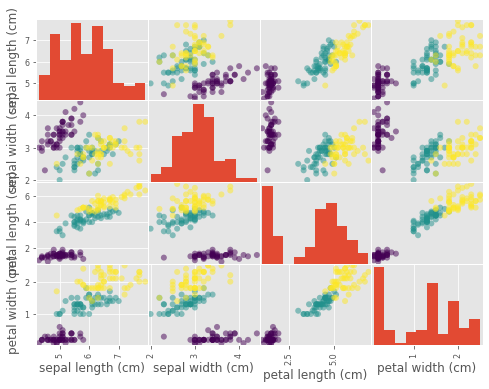

In [ ]:
# Visual EDA of df Iris

_ = pd.plotting.scatter_matrix(X, c=y,figsize=(8, 6),marker='o')


# KNN (K-nearest neighbors) Classifier

Sklearn API requires:


**1) Data in numpy array or pandas DataFrame**

**2) Features need to be continuous values**

**3) No missing values in the data**

In [ ]:
# For Iris dataset, we have k=3 because 3 type of Iris plants:
# Setosa, Virginica and Versicolor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
# Pass features and target(y) as a "numpy array" or "pandas DataFrame"
knn.fit(iris.data, iris.target) # or knn.fit(df,y), it is usually ised knn.fit(X,y) 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

## How to measure KNN performance?

### In classification, accuracy is a commonly used metric
Accuracy = Fraction of correct predictions
Of course need to compute accuracy on new data that the model hasn't seen before (test data). It's called unseen data.

### Train_test_split

In [ ]:
# Random State for reproducibility
# Stratify=y is an important keyword argument, because it's best practice to ensure the split reflects the labels on your data
# (Keep proportion of labels in each train and test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Test set predictions: {}'.format(y_pred))


Test set predictions: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [ ]:
# Now we check out the accuracy of the KNN model passing the .score method

print('Accuracy for KNN, with k=8 is: {:.3f}'.format(knn.score(X_test,y_test)))


Accuracy for KNN, with k=8 is: 0.956


## Model Complexity Curve

Larger K = smoother decision boundary = less complex model

Smaller K = more complex model = can lead to overfitting

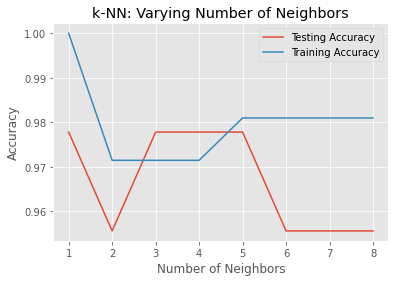

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Class Imbalance and accuracy problem

Example of Real E/mail 99% and spam 1%. Accuracy is no longer a useful metric


### Confusion Matrix

True Positive = Predicted positive. Actual: Positive

False Positive = Predicted positive. Actual: Negative

False Negative = Predicted negative. Actual: Positive

True Negative = Predicted positive. Actual: Positive

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]])

#### Precision or positive predictive value or PPV

This is the number of True Positives divided by the total number of True Positives and False Positives.

**Correctly labeled Spam e-mails for example.

#### Recall, sensitivity rate, hit rate or true positive rate

True Positives divided by the total number of True Positives and False Negatives.

#### F1 Score

2 * precision*recall / (precision+recall)

That is the harmonic mean of precision and recall

In [ ]:
# Calculate precision, recall and F1-Score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# Logistic Regression

Used of course in classification problems, not in regression problems.

Binary Classification

Logistic regression outputs probabilities (p) in respect to the target variable

If p > 0.5 we label data as 1.

If p < 0.5 we label data as 0.

It produces a **linear** decision boundary




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_pred


array([0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0])

## ROC Curve: Changing thresholds for p

By default LogisticRegression uses a threshold of 0.5

What happens if we vary this threshold?

p = 0? Predicts 1 for all the data

p = 1? Predicts 0 for all data

If we vary this p's we get a series of different True Positive and False Positive rates.

All set of points trying all possible threshold is called the ROC curve (reciever operating characteristic curve)



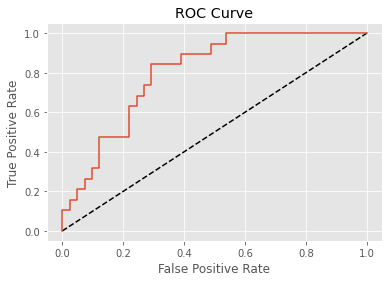

In [ ]:
# Make a LogisticRegression with only 2 classes
# So i'm going to destroy the data set and convert all y=2 to 0
y[y>1] = 0


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

logreg.fit(X_train,y_train)


from sklearn.metrics import roc_curve

# We slice [:1] we choose the column for the probabilities being 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# We unpack into False Positive Rate, True Positive Rate and the thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



### Area under ROC Curve

Area under ROC Curve (AUC) is a **popular metric for classification models**.

The larger the area under the curve the better the model.

If False Positive Rate is 0 and True Positive Rate is 1, the model would be perfect. The area under the curve would be a triangle.



In [ ]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

logreg.fit(X_train,y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_pred_prob)

0.8010269576379975

### Area under ROC Curve with Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

cv_scores

array([0.805, 0.915, 0.695, 0.585, 0.71 ])

In [ ]:
# go back the dataset to normality

y= iris.target

# Hyperparameter Tuning

Ridge/Lasso: Choosing **alpha**
KNN: Choosing **n_neighbors**

Hyperparameters cannot be learned by fitting the model

Choosing the correct hyperparameter: Try a bunch of different parameters, choose the best performing one.

It's essential to use cross-validation to calculate metrics of performance on unseen data.








## Grid Search cross-validation

A Table of two hyperparameter combination where values are the metrics for those hyperparameter for use in the model. 



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()

# Create a GridSearch object
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X,y)

# It looks like a n_neighbors = 4 gives the best score
print(knn_cv.best_params_)
print(knn_cv.best_score_)


{'n_neighbors': 4}
0.9666666666666668


## RandomizedSearchCV

I just copy the code for a Decision Tree Classifier

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. 

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


## Hold Out set

You want to be absolutely certain about your model's ability to generalize to unseen data.

Tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.



In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization.

Create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

## Hold Out set for Logistic Regression for "C" and "Penalty"

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

Tuned Logistic Regression Parameter: {'C': 2275.845926074791, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7222222222222221
